**Task 1(c): Take grayscale image of size 512x512, illustrate the Histogram of the image & make Single Threshold Segmentation observed from the histogram**

### Importing the Libraries

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Function for generating Histogram

In [15]:
def generate_histogram(image):
    gray_levels_count = np.zeros(256)
    height, width = image.shape

    for r in range (width):
        for c in range(height):
            gray_levels_count[image[c, r]] += 1

    plt.bar(range(256), gray_levels_count, width = 1.0, color = "gray")
    plt.title("The Histogram of the Image")
    plt.show()

    return gray_levels_count

### Loading the Original Image

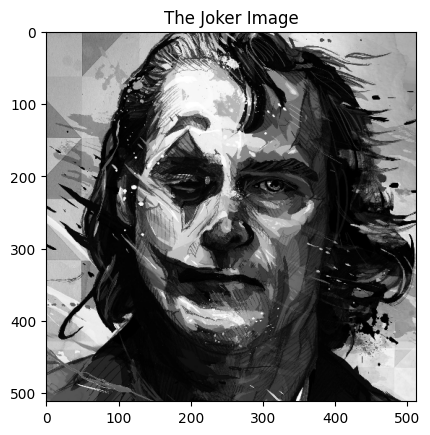

In [16]:
joker_image = cv2.resize(cv2.imread("./Images/Joker 1938x1938.jpg", 0), (512, 512))
plt.imshow(cv2.cvtColor(joker_image, cv2.COLOR_BGR2RGB))
plt.title("The Joker Image")
plt.show()

### Showing the Histogram of the Image

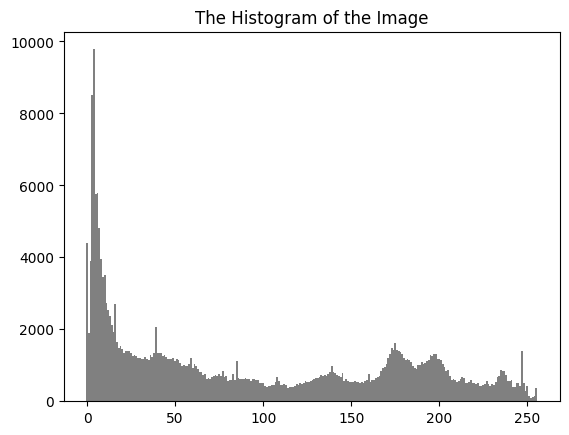

In [17]:
original_image_histogram = generate_histogram(joker_image)

### Calculating Threshold observed from the Histogram

In [18]:
threshold_point = np.sum(original_image_histogram) // 2
threshold_intensity = 0

while True:
    if (threshold_point <= 0):
        break
    threshold_point -= original_image_histogram[threshold_intensity]
    threshold_intensity += 1

### Making single threshold segmentation

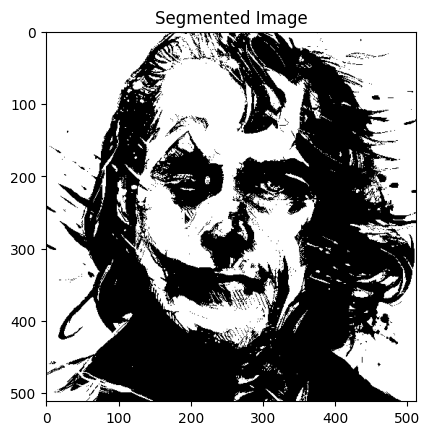

In [19]:
segmented_image = np.where(joker_image > threshold_intensity, 255, 0)
segmented_image = np.uint8(segmented_image)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.show()

### Showing the Histogram of the Segmented Image

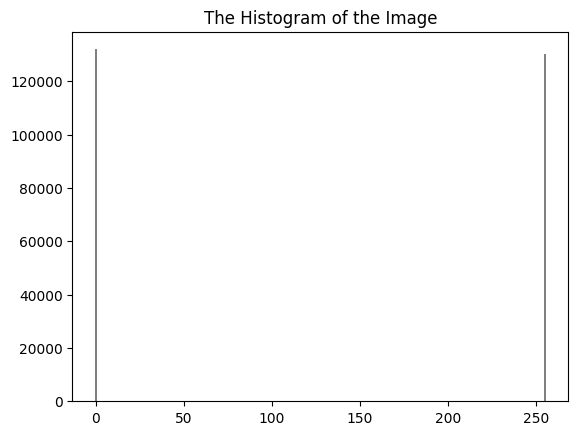

In [20]:
segmented_image_histogram = generate_histogram(segmented_image)